In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("The Coffe Sale.xlsx")
df.head(2)

,TID,Date,Day,Month,Time,Hour,Quantity,Store_ID,Store_Location,Prod_ID,Unit_Price,Total_Price,Prod_Category,Prod_Type,Prod_Details
0,1,2023-01-01,Sunday,Jan,07:06:11,7,2,5,Lower Manhattan,32,3.0,6.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,Sunday,Jan,07:08:56,7,2,5,Lower Manhattan,57,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
df.isnull().sum()

TID               0
Date              0
Day               0
Month             0
Time              0
Hour              0
Quantity          0
Store_ID          0
Store_Location    0
Prod_ID           0
Unit_Price        0
Total_Price       0
Prod_Category     0
Prod_Type         0
Prod_Details      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   TID             149116 non-null  int64         
 1   Date            149116 non-null  datetime64[ns]
 2   Day             149116 non-null  object        
 3   Month           149116 non-null  object        
 4   Time            149116 non-null  object        
 5   Hour            149116 non-null  int64         
 6   Quantity        149116 non-null  int64         
 7   Store_ID        149116 non-null  int64         
 8   Store_Location  149116 non-null  object        
 9   Prod_ID         149116 non-null  int64         
 10  Unit_Price      149116 non-null  float64       
 11  Total_Price     149116 non-null  float64       
 12  Prod_Category   149116 non-null  object        
 13  Prod_Type       149116 non-null  object        
 14  Prod_Details    149116 non-null  obj

In [5]:
df.describe()

,TID,Date,Hour,Quantity,Store_ID,Prod_ID,Unit_Price,Total_Price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,11.735790,1.438276,5.342063,47.918607,3.382219,4.686367
min,1.000000,2023-01-01 00:00:00,6.000000,1.000000,3.000000,1.000000,0.800000,0.800000
25%,37335.750000,2023-03-06 00:00:00,9.000000,1.000000,3.000000,33.000000,2.500000,3.000000
50%,74727.500000,2023-04-24 00:00:00,11.000000,1.000000,5.000000,47.000000,3.000000,3.750000
75%,112094.250000,2023-05-30 00:00:00,15.000000,2.000000,8.000000,60.000000,3.750000,6.000000
max,149456.000000,2023-06-30 00:00:00,20.000000,8.000000,8.000000,87.000000,45.000000,360.000000
std,43153.600016,NaN,3.764662,0.542509,2.074241,17.930020,2.658723,4.227099


In [6]:
len(df)

149116

In [7]:
# 2. Which store location has the most transactions?
df['Store_Location'].value_counts().idxmax()

"Hell's Kitchen"

In [8]:
#3. What is the average transaction quantity?
df['Total_Price'].mean()

np.float64(4.686367190643527)

In [9]:
#4. Which product category has the most transactions?
df['Prod_Category'].value_counts().idxmax()

'Coffee'

In [10]:
#5. What is the total revenue?
df['Total_Price'].sum()

np.float64(698812.3300000002)

In [11]:
#6. Which day of the week has the most transactions?
df['Day'].value_counts().idxmax()

'Friday'

In [12]:
# 7. What is the average unit price?
df['Unit_Price'].mean()

np.float64(3.382219413074385)

In [14]:
# 8. Which store ID has the most transactions?
df['TID'].value_counts().idxmax()

np.int64(149456)

In [16]:
# 9. What is the total number of products sold?
df['Prod_ID'].nunique()

80

In [17]:
# 10. Which hour of the day has the most transactions?
df['Hour'].value_counts().head(3).reset_index()

,Hour,count
0,10,18545
1,9,17764
2,8,17654


In [18]:
#1. What is the trend of transactions over month?
df['Month'].value_counts().head(3).reset_index()

,Month,count
0,Jun,35352
1,May,33527
2,Apr,25335


In [20]:
#2. Which product type has the highest average unit price?
M2=df.groupby('Prod_Type')['Unit_Price'].max().head(5).reset_index()
M2

,Prod_Type,Unit_Price
0,Barista Espresso,4.25
1,Biscotti,4.38
2,Black tea,8.95
3,Brewed Black tea,3.00
4,Brewed Chai tea,4.00


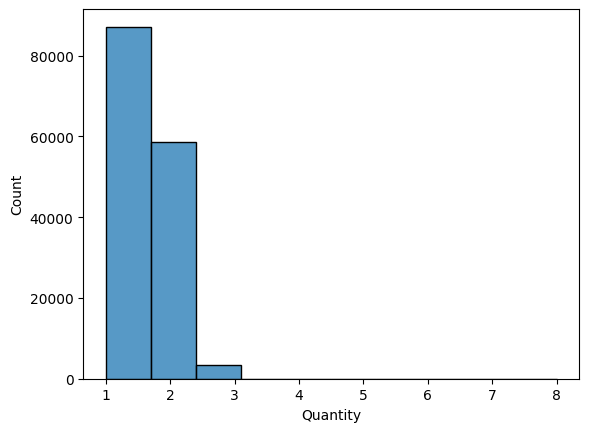

In [22]:
# 3. What is the distribution of transaction quantities?
df['Quantity'].describe()
sns.histplot(x='Quantity', data=df , bins=10)
plt.show()

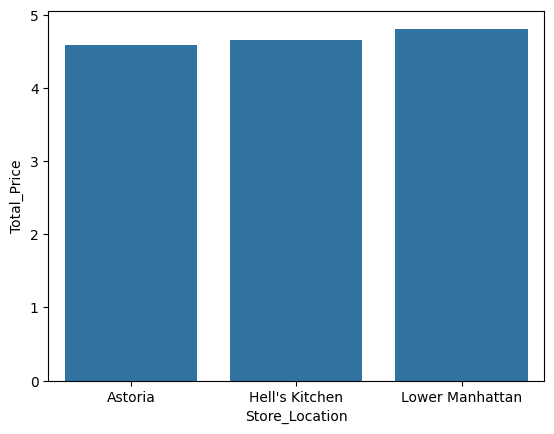

In [23]:
# 4 ] Which store location's has the highest average transaction value?
M4=df.groupby('Store_Location')['Total_Price'].mean().head(5).reset_index()
sns.barplot(x='Store_Location',y='Total_Price', data=M4)
plt.show()

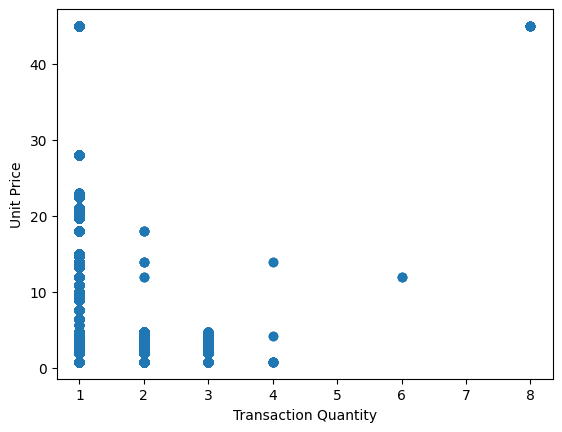

In [24]:
# 5. What is the correlation between transaction quantity and unit price?
df['Quantity'].corr(df['Unit_Price'])
plt.scatter(df['Quantity'], df['Unit_Price'])
plt.xlabel('Transaction Quantity')
plt.ylabel('Unit Price')
plt.show()

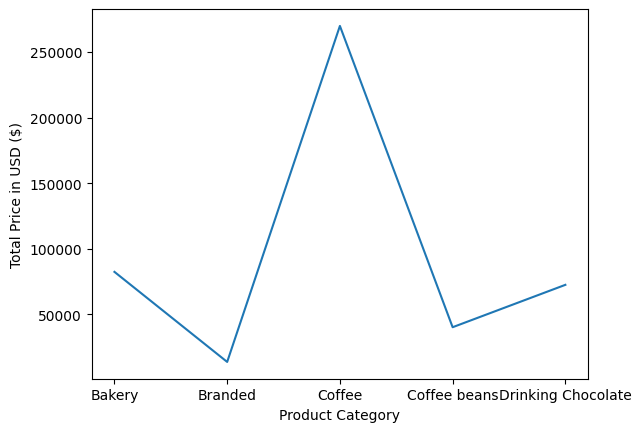

In [25]:
# 6. Which product category has the highest total revenue?
M6=df.groupby('Prod_Category')['Total_Price'].sum().head(5).reset_index()
sns.lineplot(x='Prod_Category' , y='Total_Price' , data=M6)
plt.xlabel('Product Category')
plt.ylabel('Total Price in USD ($)')
plt.show()

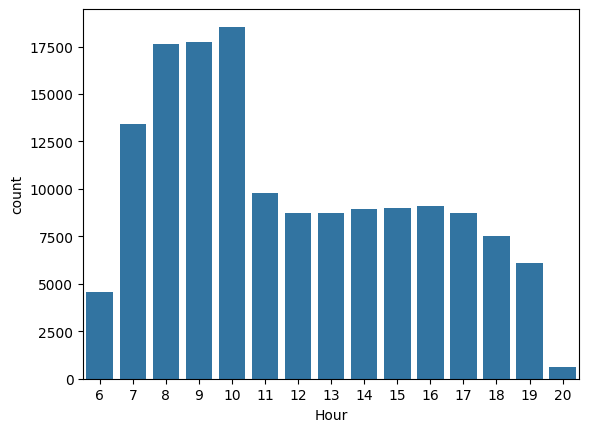

In [26]:
# 7 What is the distribution of transaction times?
sns.countplot(x='Hour' , data=df)
plt.show()

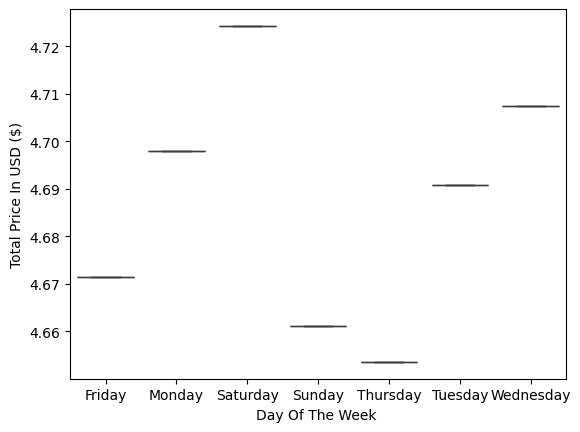

In [28]:
# 8.  highest average transaction value as per Weekday's?
M8= df.groupby('Day')['Total_Price'].mean().reset_index()
sns.boxplot(x='Day' , y= 'Total_Price' , data=M8)
plt.xlabel('Day Of The Week ')
plt.ylabel('Total Price In USD ($)')
plt.show()

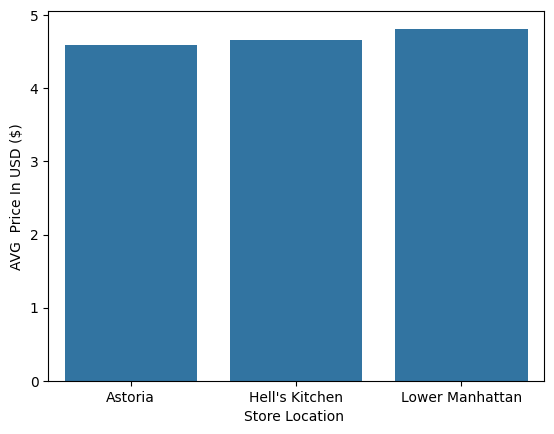

In [32]:
# 9. What is the average transaction value by store ID?
M8=df.groupby('Store_Location')['Total_Price'].mean().reset_index()
sns.barplot(x='Store_Location', y='Total_Price' , data=M8)
plt.xlabel('Store Location ')
plt.ylabel('AVG  Price In USD ($)')
plt.show()

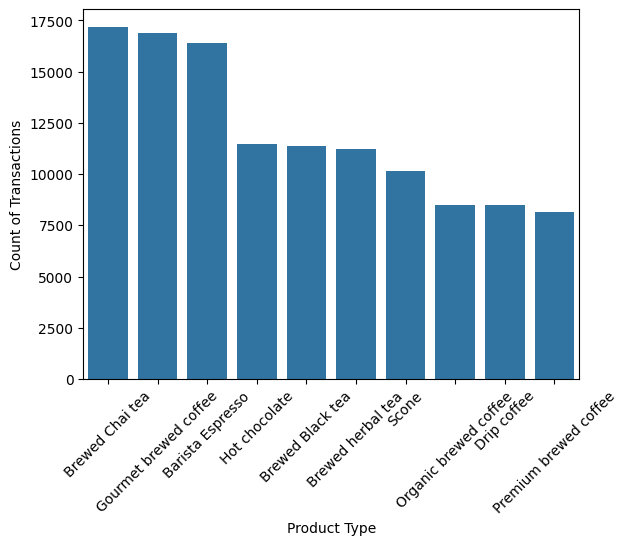

In [35]:
# 10. Which product's  has the most transactions?
M10 = df['Prod_Type'].value_counts().head(10).reset_index()
M10.columns = ['Product Type', 'Count of Transactions']

sns.barplot(x='Product Type', y='Count of Transactions', data=M10)
plt.xlabel('Product Type')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=45)
plt.show()


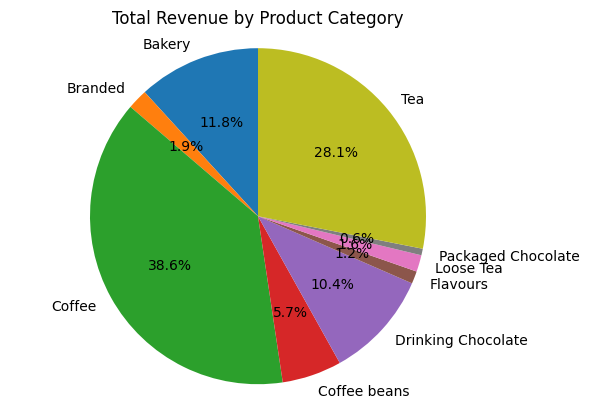

In [37]:
#11  What is the total revenue by product category?
category_revenue = df.groupby('Prod_Category')['Total_Price'].sum().reset_index()
plt.pie(category_revenue['Total_Price'], labels=category_revenue['Prod_Category'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Total Revenue by Product Category')
plt.show()


In [42]:
# 13. What is the distribution of unit prices?
df['Unit_Price'].describe()

count    149116.000000
mean          3.382219
std           2.658723
min           0.800000
25%           2.500000
50%           3.000000
75%           3.750000
max          45.000000
Name: Unit_Price, dtype: float64

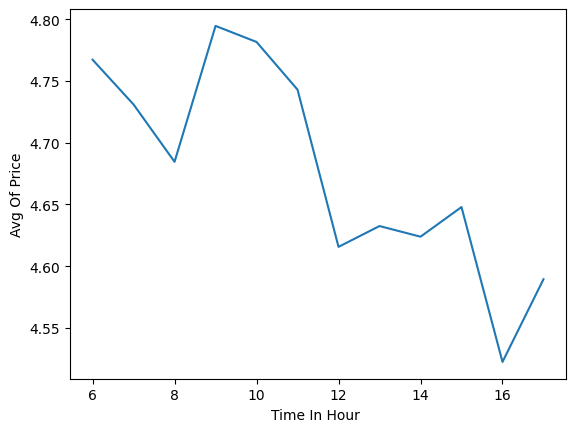

In [44]:
# Which hour of the day has the highest average transaction value?
M14=df.groupby('Hour')['Total_Price'].mean().head(12).reset_index()
sns.lineplot(x='Hour' , y='Total_Price' , data=M14 )
plt.xlabel('Time In Hour ')
plt.ylabel('Avg Of Price')
plt.show()

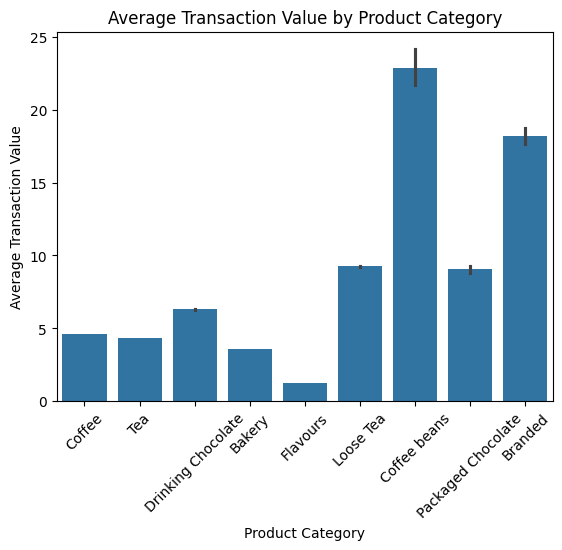

In [48]:
#What is the correlation between transaction value and product category?
sns.barplot(x='Prod_Category', y='Total_Price', data=df)
plt.xlabel('Product Category')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=45)
plt.title('Average Transaction Value by Product Category')
plt.show()


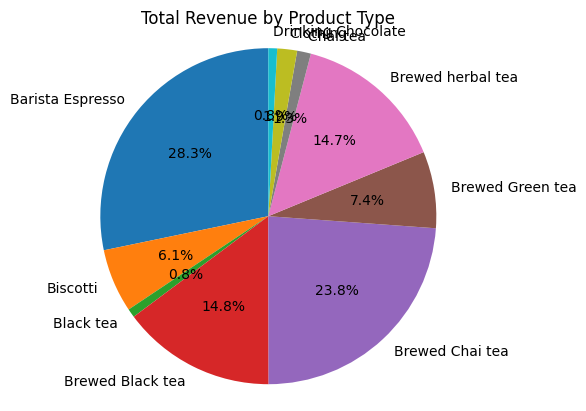

In [53]:
#16 What is the total revenue by product category?
M16 = df.groupby('Prod_Type')['Total_Price'].sum().reset_index()
plt.pie(category_revenue['Total_Price'], labels=category_revenue['Prod_Type'], autopct='%1.1f%%', startangle=90,data=M16)
plt.axis('equal')
plt.title('Total Revenue by Product Type')
plt.show()

In [54]:
df.columns

Index(['TID', 'Date', 'Day', 'Month', 'Time', 'Hour', 'Quantity', 'Store_ID',
       'Store_Location', 'Prod_ID', 'Unit_Price', 'Total_Price',
       'Prod_Category', 'Prod_Type', 'Prod_Details'],
      dtype='object')

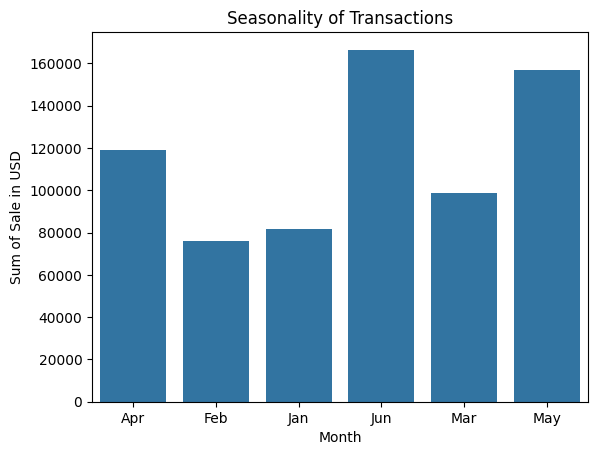

In [56]:
H1 = df.groupby('Month')['Total_Price'].sum().reset_index()

sns.barplot(x='Month', y='Total_Price', data=H1)
plt.xlabel('Month')
plt.ylabel('Sum of Sale in USD')
plt.title('Seasonality of Transactions')
plt.show()


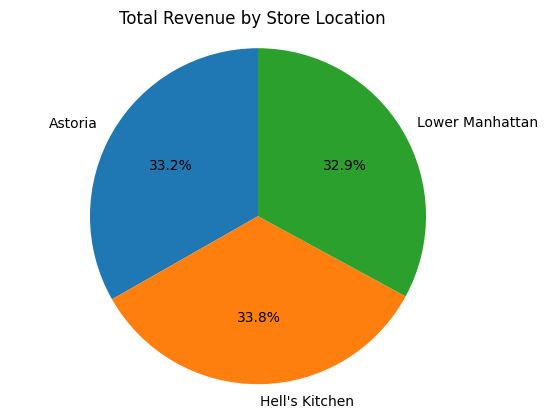

In [57]:
# Which store  has the highest sales?
category_revenue = df.groupby('Store_Location')['Total_Price'].sum().reset_index()
plt.pie(category_revenue['Total_Price'], labels=category_revenue['Store_Location'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Total Revenue by Store Location  ')
plt.show()